# Covarianza

La covarianza es un valor que indica el grado de variación **lineal** conjunta de dos variables aleatorias respecto a sus medias.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Tendremos alta covarianza (positiva) cuando, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Tendremos baja covarianza (negativa) cuando, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Tendremos covarianza cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


Su formula es la siguiente:
\\[
cov(X,Y) = \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)
\\]

Recordemos la formula de la varianza:
\\[
Var(x) =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2
\\]

La covarianza de una variable aleatoria consigo misma es igual a la varianza:
\\[
cov(X,Y) = Var(x)
\\]

En R la calculamos con la función *cov(x,y)*


[1] "La covarianza de las variables x,y1 es: 13.72"

[1] "La covarianza de las variables x,y2 es: 0.93"

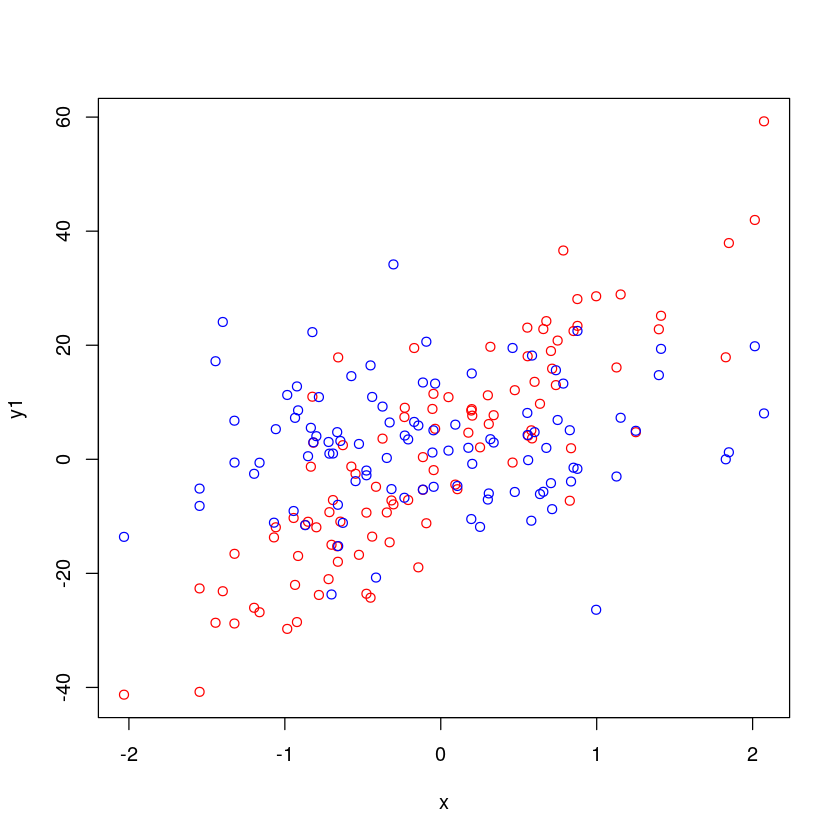

In [38]:
n<-100
x<-rnorm(n,sd=1)
y1<-20*x+1+rnorm(n,mean=1,sd=10)
y2<-rnorm(n,mean=2,sd=10)
cv1<-cov(x,y1)
cv2<-cov(x,y2)
paste("La covarianza de las variables x,y1 es:",round(cv1,2))
paste("La covarianza de las variables x,y2 es:",round(cv2,2))
plot(x,y1,col="red")
points(x,y2,col="blue")

[1] "La covarianza de las variables x,y es: 0.1"

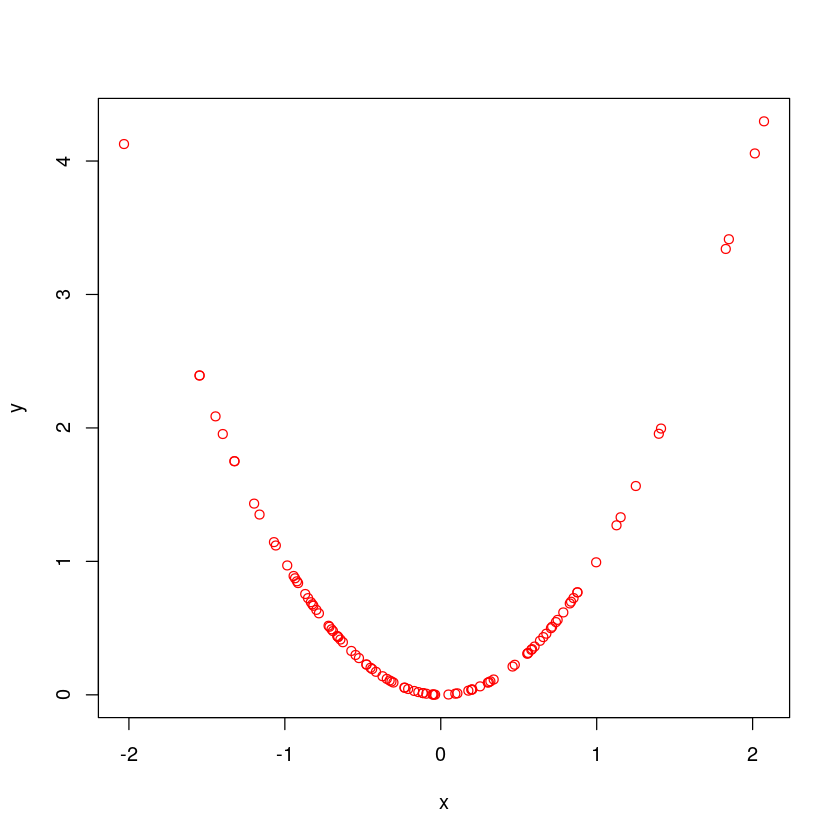

In [40]:
y<-x^2
cv<-cov(x,y)
paste("La covarianza de las variables x,y es:",round(cv,2))
plot(x,y,col="red")

# Correlación

La correlación es un valor que indica el grado de variación conjunta y **lineal** de dos variables aleatorias. Es la covarianza normalizada en el rango $[-1,1]$. Es una forma de ignorar la variación de cada una de las variables en si y centrarse únicamente en la relación que existe entre ambas, ya que una covarianza alta puede venir dada también porque una de las variables a estudiar tenga una varianza elevada.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Correlación cercana a 1, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Correlación cercana a -1, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Correlación cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


La función de correlación es:
\\[
\rho_{X,Y} = corr (X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y} 
\\]

En R la calculamos con la función *cor(x,y)*


In [43]:
cr1<-cor(x,y1)
cr2<-cor(x,y2)
paste("La covarianza de las variables x,y1 es:",round(cr1,2))
paste("La covarianza de las variables x,y2 es:",round(cr2,2))

cr<-cor(x,y)
paste("La covarianza de las variables x,y es:",round(cr,2))

[1] "La covarianza de las variables x,y1 es: 0.86"

[1] "La covarianza de las variables x,y2 es: 0.1"

[1] "La covarianza de las variables x,y es: 0.12"

## Correlación no implica causalidad

Que dos variables estén correladas no implica que una una es la causa de la otra, es decir, que haya una relación directa entre ambas.

Por ejemplo, existe una correlación de 0.992558 entre la tasa de divorcio en el estado de Maine y el consumo de margarina por habitante:
![](correlacion-margarina-divorcio.png)

Fallos comunes que pueden llevar a buscar una correlación alta:
* Utiliza solo la ventana de datos que te interesa.
* Compara muchas variables entre sí, por puro azar algunas evolucionarán a la par.

Más ejemplos en [tylervigen](http://www.tylervigen.com/spurious-correlations).



![Imagen no cargada. Edita y borra la @ ](https://xkcd.com/552/ @ )

Dos variables también pueden estar correladas entre sí, pero la causalidad puede ser debida a una tercera variable oculta que no vemos.
Por ejemplo:

In [47]:
set.seed(2807)
x <- rnorm(100)
y <- 2*x+1+rnorm(100,0,0.1)
print(paste("La correlación entre x,y es:", cor(x,y)))

z <- 2*x+1+rnorm(100,0,0.1)
print(paste("La correlación entre x,z es:", cor(x,z)))

print(paste("Aunque no existe ninguna relación directa entre z,y existe una alta correlación:", cor(y,z)))

[1] "La correlación entre x,y es: 0.998826076751464"
[1] "La correlación entre x,z es: 0.998750973902264"
[1] "Aunque no existe ninguna relación directa entre z,y existe una alta correlación: 0.997110500303841"


### Paradoja de Simpson

La paradoja de Simpson o el efecto Yule-Simpson, es un fenómeno en el cual una tendencia aparece en grupos diferentes pero desaparece cuando esos grupos son combinados.

TODO: https://www.statslife.org.uk/the-statistics-dictionary/2012-simpson-s-paradox-a-cautionary-tale-in-advanced-analytics

x,y,group
0,4,A
1,6,A
2,8,A
3,10,A
4,12,A
10,-10,B
11,-8,B
12,-6,B
13,-4,B
14,-2,B


[1] "La correlación de x,y, sin tener en cuenta los grupos es: -0.790209749998602"
[1] "La correlación de x,y, para el grupo A: 1"
[1] "La correlación de x,y, para el grupo B: 1"


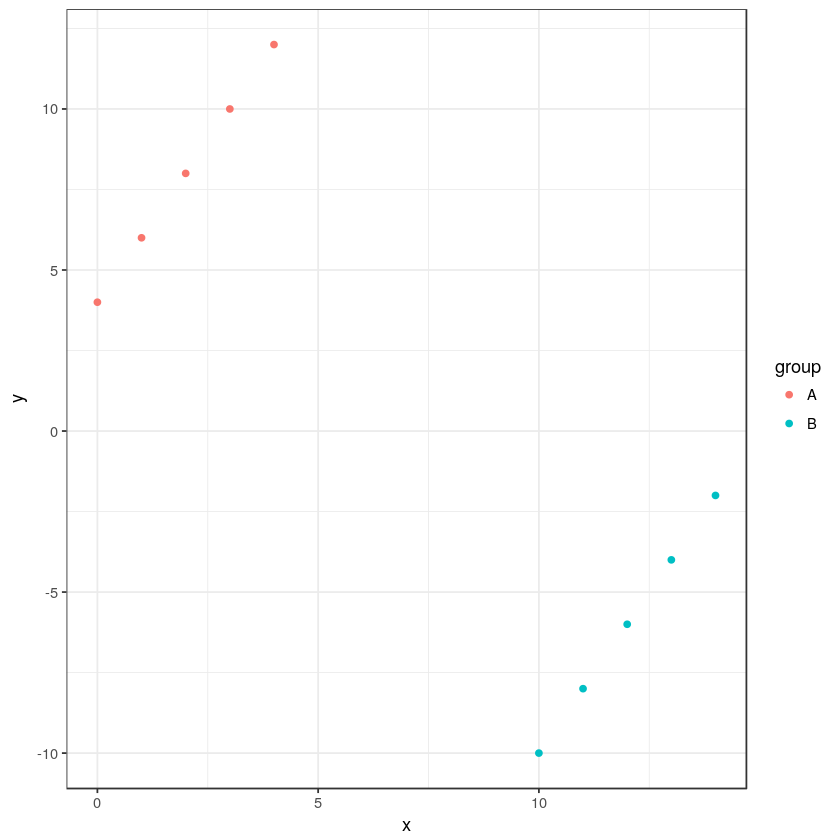

In [2]:
x1<-0:4
y1<-2*x1+4

x2<-10:14
y2<-2*x2-30

df<-data.frame(x=c(x1,x2),y=c(y1,y2),group=rep(c("A","B"),each=length(x1)))
library(ggplot2)
ggplot(data=df,aes(x,y,color=group))+geom_point()+theme_bw()
df
print(paste("La correlación de x,y, sin tener en cuenta los grupos es:",cor(df$x,df$y)))
print(paste("La correlación de x,y, para el grupo A:",cor(x1,y1)))
print(paste("La correlación de x,y, para el grupo B:",cor(x2,y2)))

# Regresión lineal

Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, las variables independientes $X_i$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
Y=\beta_0+\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p+\varepsilon = \sum \beta_k X_k+\varepsilon
\\]


donde:
* $Y$: variable dependiente
* $X_1,X_2,\cdots ,X_p$: variables independientes
* $\beta_0, \beta_1,\beta_2,\cdots ,\beta_p$: parámetros a determinal que dado un $X_k$ produce el mejor posible $Y$
* $\varepsilon$: error, valor aleatorio.

Condiciones para aplicarlo:
1. Que la relación entre las variables sea lineal.
2. Que los errores en la medición de $X_k$ sean independientes entre sí.
3. Que los errores tengan varianza constante.
4. Que los errores tengan una media aritmética igual a cero.



Para calcular el valor óptimo de $\beta$ vamos a utilizar un poco de álgebra linea. 

Primero escribimos la formula con su forma matricial:
\\[
Y=\beta \cdot X+\varepsilon
\\]
Tratamos de resolver el sistema con el menor valor de $\varepsilon$ posible, así que suponemos:
\\[
Y=\beta \cdot X
\\]
Donde:
* $\beta \in \mathbb{R}^{n \times p}$ 
* $Y \in \mathbb{R}^{n \times m}$ 
* $X \in \mathbb{R}^{n \times m}$ 


# Regresión lineal


Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, la variables independiente $X$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
y_i=\beta_0+\beta_1 x_i+\varepsilon_i  \quad \text{para }i=1,\dots,n
\\]

Esto significa que se puede expandir de la forma:
\\[
\begin{split}
y_1 &=\beta_0+\beta_1 x_1+\varepsilon_1  \\
y_2 &=\beta_0+\beta_1 x_2+\varepsilon_2  \\
\vdots& \\
y_n&=\beta_0+\beta_1 x_n+\varepsilon_n 
\end{split}
\\]


donde:
* $y_i$: i-esimo valor de la variable dependiente
* $x_i$: i-esimo valor de la variable independiente
* $\beta_0, \beta_1$: parámetros a determinal que dado un conjunto de $x_i$ produce los mejores $y_i$
 * $\beta_0$ : Puede ser llamado sesgo, bias, intercept o término constante. Indica el corte en el eje Y
 * $\beta_1$ : Puede ser llamado pendiente, slope. Indica cuanto aumenta Y por cada incremento de X
* $\varepsilon_i$: error, valor aleatorio.

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_1\\ 
 1 & x_2 \\ 
 \vdots & \vdots \\ 
 1 & x_n 
\end{bmatrix}
\begin{bmatrix}
\beta_0
\\ 
\beta_1
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]




Donde:
* $Y \in \mathbb{R}^{n \times 1}$ 
* $X \in \mathbb{R}^{n \times 2}$ 
* $\beta \in \mathbb{R}^{1 \times 2}$ 
* $\varepsilon \in \mathbb{R}^{n \times 1}$ 




In [12]:
n<-10
beta<-matrix(c(5,2),nrow = 2)
X<-matrix(c(rep(1,n),1:n),ncol = 2, byrow = F)

print("El valor de la matriz X es:")
X
print("El valor de la Beta es:")
beta

[1] "El valor de la matriz X es:"


1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10


[1] "El valor de la Beta X es:"


5
2


In [13]:
print("El valor de la matriz X·Beta es:")
X %*% beta

[1] "El valor de la matriz X·Beta es:"


7
9
11
13
15
17
19
21
23
25


In [14]:
print("El valor final de la matriz Y es:")
e<-rnorm(n)
Y<-X %*% beta +e
Y

[1] "El valor final de la matriz Y es:"


6.330729
9.187365
10.500974
13.380086
13.599900
16.984697
18.777173
21.808303
23.220647
26.158019


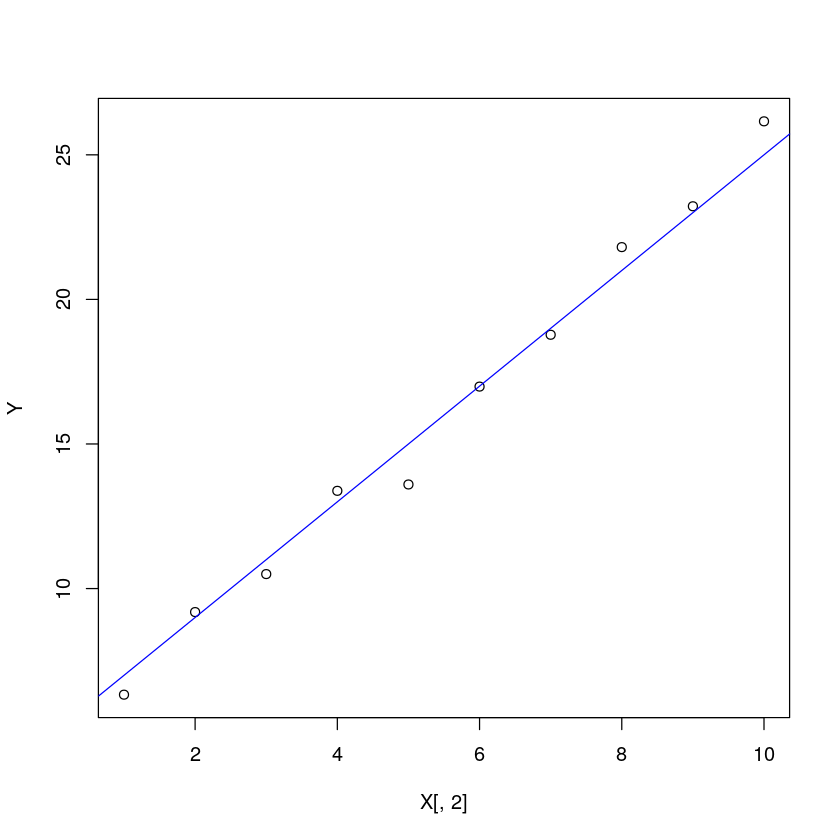

In [19]:
plot(X[,2],Y)
abline(beta,col="blue")

## ¿Cómo calculamos $\beta$?

### Definición de inversa de una matriz

La inversa de una matriz una matriz cuadrada $A$ se escribe $A^-1$ y se define como:
\\[
A^{-1} \cdot A=I=A \cdot A^{-1}
\\]

Donde I es la matriz identidad:
\\[
\begin{bmatrix}
1 & 0 & \dots & 0\\ 
0 & 1 & \dots & 0 \\ 
\vdots &  & \ddots &  \vdots \\ 
0 & 0  & \dots & 1
\end{bmatrix}
\\]



In [31]:
A<-matrix(c(1,3,5,2,3,4,1,7,8),nrow=3)
print("Tenemos una matriz A:")
A

[1] "Tenemos una matriz A:"


1,2,1
3,3,7
5,4,8


In [34]:
print("La inversa de A es:")
iA<-solve(A)
iA

[1] "La inversa de A es:"


-0.2666667,-0.8,0.7333333
0.7333333,0.2,-0.2666667
-0.2000000,0.4,-0.2000000


In [35]:
print("Si multiplicamos una matriz por su inversa obtenemso una matriz identidad")
iA %*% A

[1] "Si multiplicamos una matriz por su inversa obtenemso una matriz identidad"


1.000000e+00,-4.440892e-16,0.000000e+00
-2.220446e-16,1.000000e+00,-4.440892e-16
-2.220446e-16,0.000000e+00,1.000000e+00


Podemos usar la matriz inversa para resolver ecuaciones:
\\[
\begin{split}
u&=Av \\
A^{-1}u&=A^{-1}Av \\
A^{-1}u&=Iv \\
A^{-1}u&=v \\
\end{split}
\\]



In [40]:
print("Calculamos el vector u como resultado de multiplicar A·v")
v<-c(1,2,3)
u<-A %*% v
u

[1] "Calculamos el vector u como resultado de multiplicar A·v"


8
30
37


In [41]:
print("Comprobamos que multiplicando u por la inversa de A obtenemos v de vuelta:")
iA %*% u

[1] "Comprobamos que multiplicando u por la inversa de A obtenemos v de vuelta:"


1
2
3


### Pseudoinversa Moore-Penrose

¿Qué ocurre si la matriz que queremos invertir no es cuadrada? Entonces el sistema de ecuaciones no tiene una única solución o simplemente no tiene solución.

Lo que tratamos de encontrar es la menos mala de las soluciones.

Para números reales se define como:
\\[
X^+ = X^{\intercal} \left( XX^{\intercal}  \right)^{-1}
\\]
Cuando:
\\[
X^+X = I
\\]

\\[
X^+ = X^{\intercal} \left( XX^{\intercal}  \right)^{-1}
\\]
Cuando:
\\[
X^+X = I
\\]



El problema original consistía en querer calcular $\beta$ de tal forma que se minimice la influencia de $\varepsilon$:
\\[
Y=X \beta+\varepsilon
\\]


\\[
X^+Y=X^+X \beta
\\]

